<a href="https://colab.research.google.com/github/ryanditata/dataMining/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================
# 🧠 UNSUPERVISED MACHINE LEARNING PROJECT
# Dataset: Mall_Customers.csv
# Fokus: Customer Segmentation menggunakan Clustering
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# === 1. Load Dataset ===

df = pd.read_csv("Mall_Customers.csv")
print("✅ Data loaded successfully!")
print(df.head())

✅ Data loaded successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# === 2. Informasi Umum Dataset ===
print("\n--- Info Dataset ---")
print(df.info())
print("\n--- Statistik ---")
print(df.describe())


--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

--- Statistik ---
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34

In [ ]:
# === 3. Pembersihan dan Pra-Pemrosesan ===
# Cek missing values
print("\nMissing Values:\n", df.isnull().sum())

# Encode Gender (karena bertipe kategorikal)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Female=0, Male=1

# Pilih fitur numerik untuk analisis clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalisasi (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


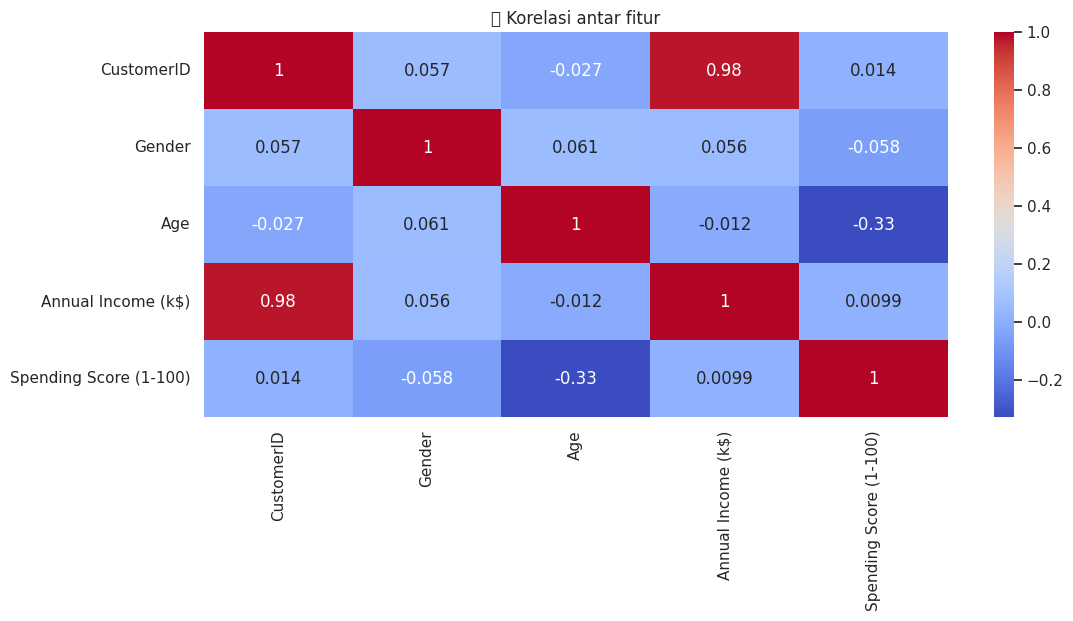

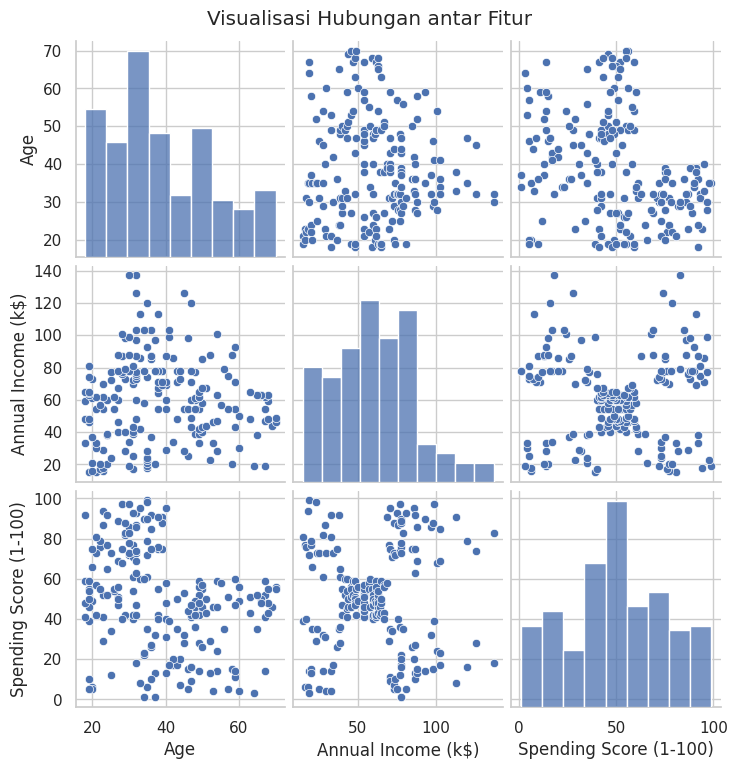

In [ ]:
# === 4. Eksplorasi Data (EDA) ===
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("📊 Korelasi antar fitur")
plt.show()

sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.suptitle("Visualisasi Hubungan antar Fitur", y=1.02)
plt.show()

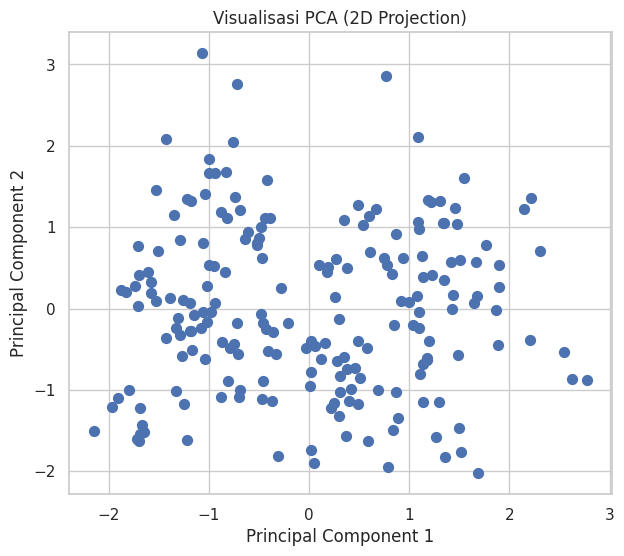

In [ ]:
# === 5. Reduksi Dimensi (PCA) untuk visualisasi ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=50)
plt.title("Visualisasi PCA (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

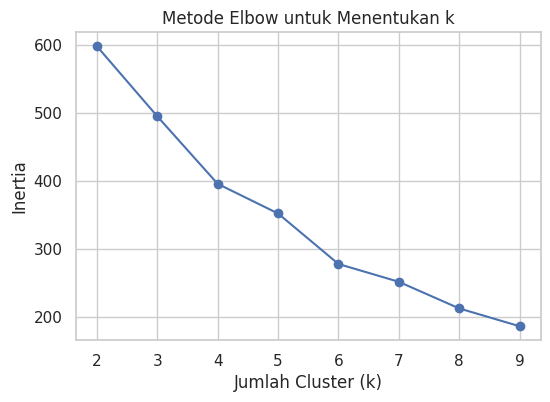

KMeans -> Silhouette: 0.272, Davies-Bouldin: 1.181


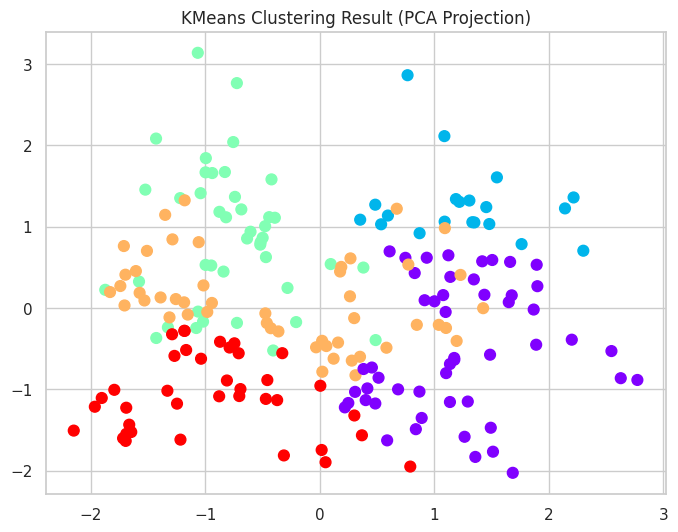

In [ ]:
# === 6. Clustering Model 1: KMeans ===
inertia = []
K_range = range(2,10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.title("Metode Elbow untuk Menentukan k")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.show()

# Pilih k=5 (umum digunakan untuk dataset ini)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['Cluster_KMeans'] = kmeans_labels

# Evaluasi KMeans
sil_km = silhouette_score(X_scaled, kmeans_labels)
db_km = davies_bouldin_score(X_scaled, kmeans_labels)
print(f"KMeans -> Silhouette: {sil_km:.3f}, Davies-Bouldin: {db_km:.3f}")

# Visualisasi cluster hasil KMeans
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='rainbow', s=60)
plt.title("KMeans Clustering Result (PCA Projection)")
plt.show()

Agglomerative -> Silhouette: 0.287, Davies-Bouldin: 1.220


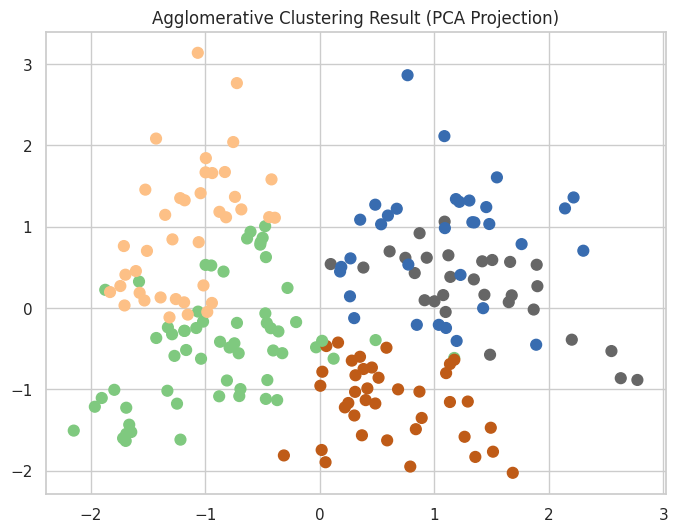

In [ ]:
# === 7. Clustering Model 2: Agglomerative Clustering ===
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X_scaled)
df['Cluster_Agg'] = agg_labels

sil_agg = silhouette_score(X_scaled, agg_labels)
db_agg = davies_bouldin_score(X_scaled, agg_labels)
print(f"Agglomerative -> Silhouette: {sil_agg:.3f}, Davies-Bouldin: {db_agg:.3f}")

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=agg_labels, cmap='Accent', s=60)
plt.title("Agglomerative Clustering Result (PCA Projection)")
plt.show()

DBSCAN -> Silhouette: 0.17209872109761942, Davies-Bouldin: 2.73618894273725


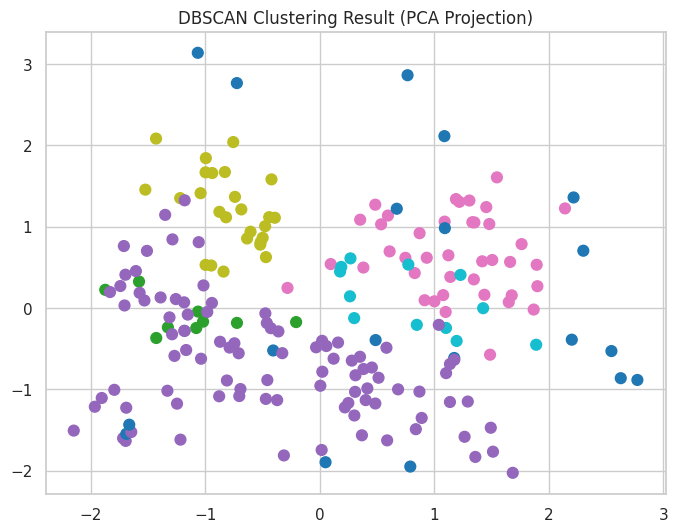

In [ ]:
# === 8. Clustering Model 3: DBSCAN ===
dbscan = DBSCAN(eps=0.8, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)
df['Cluster_DBSCAN'] = db_labels

sil_db, db_db = None, None
if len(set(db_labels)) > 1:
    sil_db = silhouette_score(X_scaled, db_labels)
    db_db = davies_bouldin_score(X_scaled, db_labels)
print(f"DBSCAN -> Silhouette: {sil_db}, Davies-Bouldin: {db_db}")

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap='tab10', s=60)
plt.title("DBSCAN Clustering Result (PCA Projection)")
plt.show()

Gaussian Mixture -> Silhouette: 0.222, Davies-Bouldin: 1.211


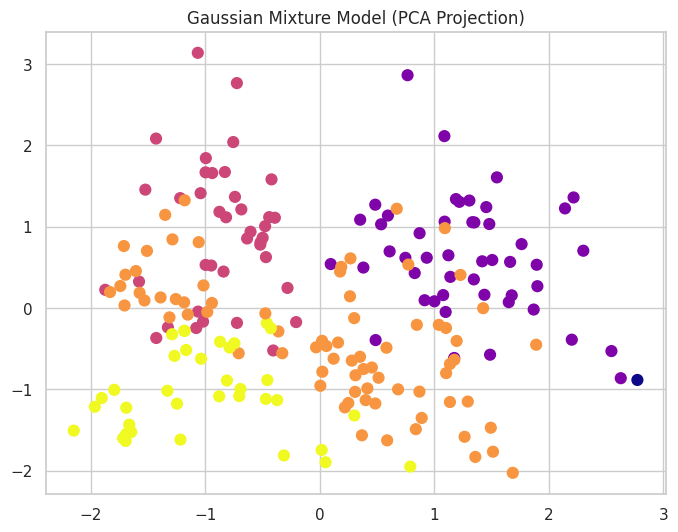

In [ ]:
# === 9. Clustering Model 4 (Opsional): Gaussian Mixture ===
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
df['Cluster_GMM'] = gmm_labels

sil_gmm = silhouette_score(X_scaled, gmm_labels)
db_gmm = davies_bouldin_score(X_scaled, gmm_labels)
print(f"Gaussian Mixture -> Silhouette: {sil_gmm:.3f}, Davies-Bouldin: {db_gmm:.3f}")

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=gmm_labels, cmap='plasma', s=60)
plt.title("Gaussian Mixture Model (PCA Projection)")
plt.show()

In [ ]:
# === 10. Perbandingan Evaluasi ===
eval_results = pd.DataFrame({
    'Model': ['KMeans','Agglomerative','DBSCAN','GaussianMixture'],
    'Silhouette': [sil_km, sil_agg, sil_db, sil_gmm],
    'Davies-Bouldin': [db_km, db_agg, db_db, db_gmm]
})
print("\n=== Perbandingan Evaluasi Model ===")
print(eval_results)


=== Perbandingan Evaluasi Model ===
             Model  Silhouette  Davies-Bouldin
0           KMeans    0.271910        1.181091
1    Agglomerative    0.286994        1.219773
2           DBSCAN    0.172099        2.736189
3  GaussianMixture    0.221640        1.210614



=== Rata-rata Tiap Cluster (KMeans) ===
                  Age  Annual Income (k$)  Spending Score (1-100)
Cluster_KMeans                                                   
0               56.47               46.10                   39.31
1               39.50               85.15                   14.05
2               28.69               60.90                   70.24
3               37.90               82.12                   54.45
4               27.32               38.84                   56.21


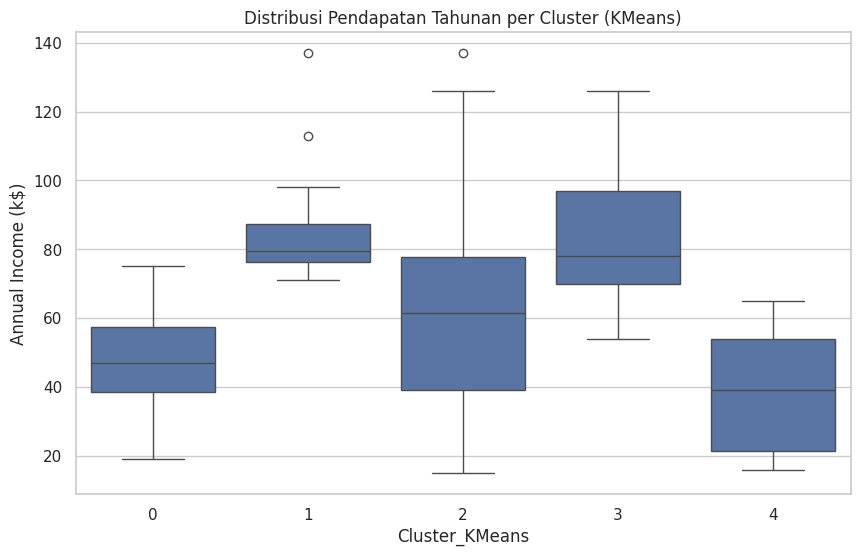

In [ ]:
# === 13. Analisis Cluster (menggunakan model terbaik: KMeans) ===
cluster_summary = df.groupby('Cluster_KMeans')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(2)
print("\n=== Rata-rata Tiap Cluster (KMeans) ===")
print(cluster_summary)

plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster_KMeans', y='Annual Income (k$)', data=df)
plt.title("Distribusi Pendapatan Tahunan per Cluster (KMeans)")
plt.show()